In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from datetime import datetime
#sns.set_style('darkgrid', {'axes.facecolor': '.9'})
#sns.set_palette(palette='deep')
#sns_c = sns.color_palette(palette='deep')
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [2]:
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

In [30]:
demand_loc = mdates.DayLocator(interval=7)
demand_fmt = mdates.DateFormatter('%Y-%m-%d')

In [38]:
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
#df=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/nyiso/nyiso_nyc_daily_all_features_selected.csv', parse_dates=['date'],date_parser=dateparse)
df=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/caiso/la_daily_all_features_selected.csv', parse_dates=['date'],date_parser=dateparse)


In [39]:
df.head()

,Unnamed: 0,date,total_load,daily_mean_temp,Restaurant_Recreaction,Grocery_Pharmacy,Retail,completely_home_device_count_percentage,median_home_dwell_time_percentage,part_time_work_behavior_devices_percentage,...,completely_home_device_count,device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,accum_confirm,new_confirm,infect_rate,accum_death,new_death,fatal_rate
0,1,2019-01-01,66469.0,9.468750,204042,46877.0,331752.0,42.816267,51.944444,3.562546,...,248253.0,579809.0,20656,9125.0,0,0.0,0.0,0,0,0.0
1,2,2019-01-02,74406.0,9.537083,273913,82571.0,511654.0,40.147701,47.361111,8.227045,...,234253.0,583477.0,48003,27026.0,0,0.0,0.0,0,0,0.0
2,3,2019-01-03,74665.0,11.833333,289507,85116.0,534533.0,37.923107,47.986111,7.810609,...,221879.0,585075.0,45698,22748.0,0,0.0,0.0,0,0,0.0
3,4,2019-01-04,75629.0,12.400833,319713,90165.0,584087.0,36.561354,46.805556,7.533205,...,214436.0,586509.0,44183,20670.0,0,0.0,0.0,0,0,0.0
4,5,2019-01-05,71496.0,11.505833,278203,78243.0,496885.0,42.330590,51.944444,4.460419,...,254624.0,601512.0,26830,11053.0,0,0.0,0.0,0,0,0.0


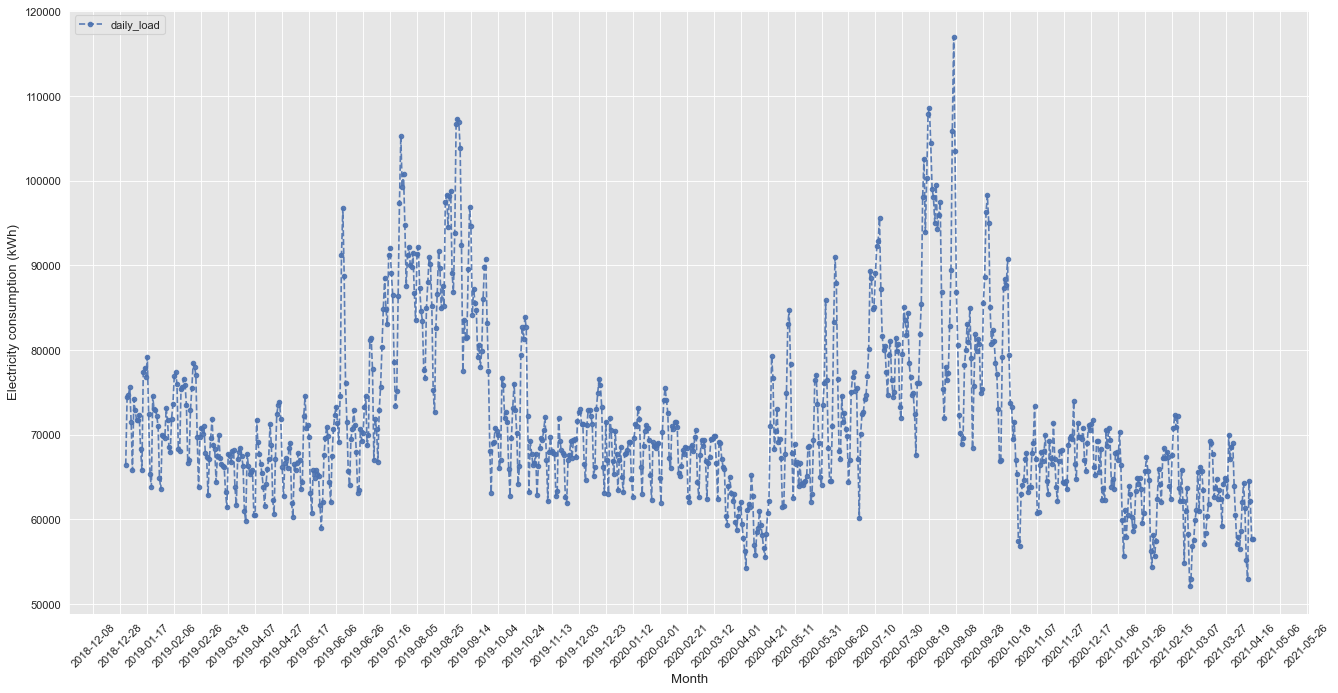

In [40]:
ax = plt.figure(figsize=(20, 10), dpi=80).add_subplot(111)
ax.plot(df['date'], df['total_load'],label='daily_load',alpha=0.9,linestyle='dashed',marker='o',markersize=4)
#sns.lineplot(x='date', y='daily_load', label='daily_load', data=df, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
#ax.set_ylim(0,300000)
ax.legend(loc='upper left')
#ax.set(title='New York Daily Load')
plt.xlabel('Month',fontdict={'size':12})
plt.ylabel('Electricity consumption (kWh)',fontsize=12)
plt.show()

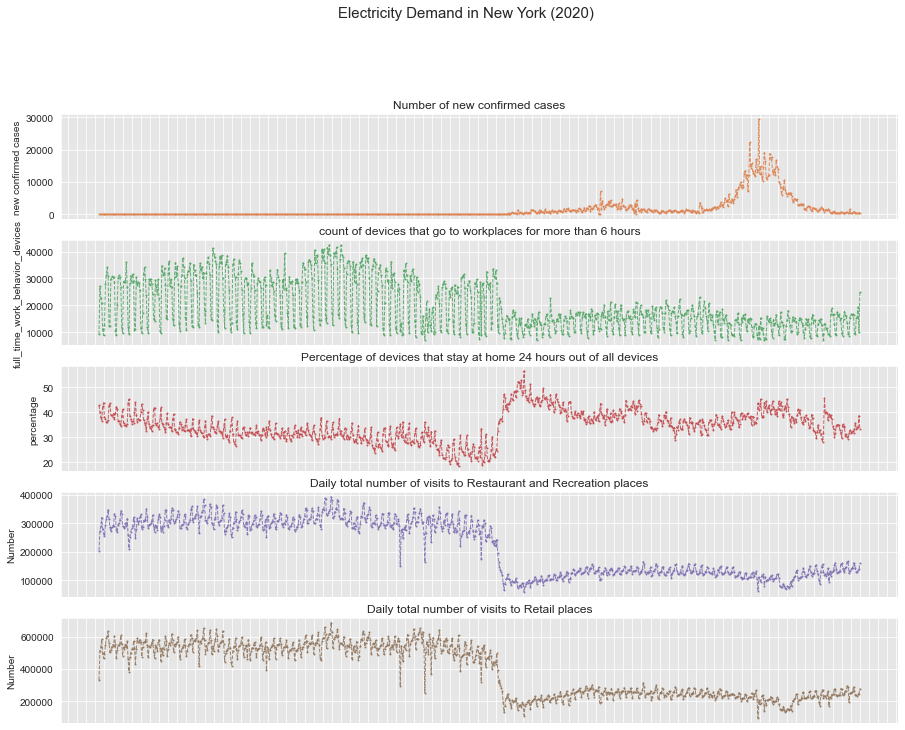

In [42]:
colors = sns.color_palette()
c1, c2, c3, c4, c5, c6 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5]

#fig = plt.figure(figsize=(15, 15))
#ax = fig.add_subplot(6, 1, 1)
#ax.plot(df['date'], df['daily_load'], lw=2,c=c1, label="load data",alpha=0.9,linestyle='dashed',marker='o',markersize=5)
#ax.set_ylabel("Hourly demand (kwh)")
#ax.set_title("New York daily load")

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(6, 1, 1)
ax.plot(df['date'], df['new_confirm'], lw=1, label="new_confirm data", c=c2,alpha=0.9,linestyle='dashed',marker='o',markersize=1)
ax.set_ylabel("new confirmed cases")
ax.set_title("Number of new confirmed cases")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

ax = fig.add_subplot(6, 1, 2)
ax.plot(df['date'], df['full_time_work_behavior_devices'], lw=1, label="full_time_work_behavior_devices", c=c3,alpha=0.9,linestyle='dashed',marker='o',markersize=1)
ax.set_ylabel("full_time_work_behavior_devices")
ax.set_title("count of devices that go to workplaces for more than 6 hours")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

ax = fig.add_subplot(6, 1, 3)
ax.plot(df['date'], df['completely_home_device_count_percentage'], lw=1, label="completely_home_device_count_percentage data", c=c4,alpha=0.9,linestyle='dashed',marker='o',markersize=1)
ax.set_ylabel("percentage")
ax.set_title("Percentage of devices that stay at home 24 hours out of all devices")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

ax = fig.add_subplot(6, 1, 4)
ax.plot(df['date'], df['Restaurant_Recreaction'], lw=1, label="Restaurant_Recreaction data", c=c5,alpha=0.9,linestyle='dashed',marker='o',markersize=1)
ax.set_ylabel("Number")
ax.set_title("Daily total number of visits to Restaurant and Recreation places")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)


ax = fig.add_subplot(6, 1, 5)
ax.plot(df['date'], df['Retail'], lw=1, label="Retail data", c=c6,alpha=0.9,linestyle='dashed',marker='o',markersize=1)
ax.set_ylabel("Number")
ax.set_title("Daily total number of visits to Retail places")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)


#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
fig.suptitle("Electricity Demand in New York (2020)",fontsize=15)
fig.autofmt_xdate()